<h2>Who Should You Target Early In Your 2023 Fantasy Football Draft?</h2>

Written By: Calvin Pitney, Tyler Jenkins, Andrew Grover, Sean Rountree

<h3>How Does Fantasy Football Work</h4>

Fantasy football isn't a new concept, and isn't all that compicated, but for those just getting into fantasy football it can be hard to understand. In fantasy football you pick players much like a real NFL team would, filling your team with quarterbacks, running backs, wide recievers, and tight ends. Every game in the regular season these players play, they earn you "fantasy points." Fantasy points can come from receptions, touchdowns, rushing yards, passing yards, etc. Based on these categories, each player earns your team points. For example if a quarterback throws 3 touchdowns, they may earn your team 21 points. Each week your team plays another team in your "fantasy league," the team with the most points at the end of the week wins, much like real football. Because fantasy operates on points, when drafting and selecting the players you want to play for your team, you generally want to select the players that will produce the most points, thats where our analysis comes in. Through this tutotial we will analyze fantasy and player data over the last 3 seasons and help make educated decisions as to what players we should target in 2023. It is worth noting that once a player is taken in the draft no other player can also have that player (much like a normal football draft).

Please visit https://www.espn.com/fantasy/football/story/_/id/34389554/fantasy-football-beginners-how-play-fantasy-football-2022 for more information as to how fantasy football works!

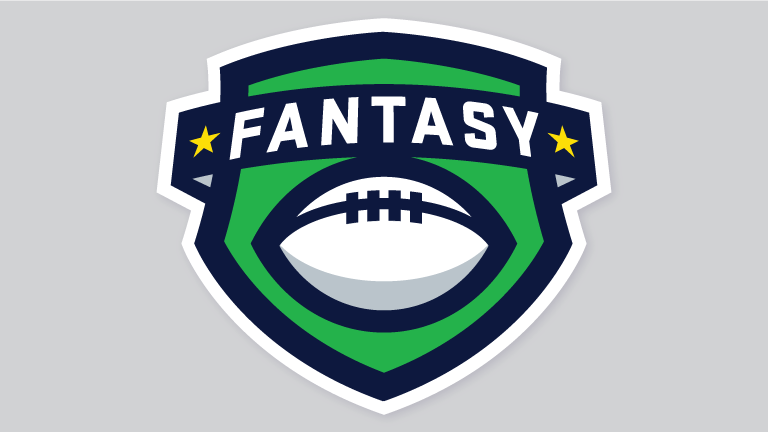

In this tutorial we will look at historical fantasy football data in order to influnece and educate the best possible picks for the 2023 season. Due to the unpredictable nature of live fantasy football drafts, we will focus our analysis on the early rounds of the draft, where more players are likely to be available, and where the draft is usually more predictable due to people wanting to pick the best players possible, not usually picking up rookies.

<h3>Section 0: Important Imports</h3>

1. Pandas - Pandas will allow us to use table like structures (dataframes) in our code, this makes aggregating data and running quick analyses simple and seemless, for more documentation please visit https://pandas.pydata.org/docs/

2. Numpy - When simple array structures don't suffice, we will utilize numpy arrays. These arrays allow for a higher level of mathematical operations and linear algebra, allowing us to do regression analysis and  machine learning. For documentation please visit https://numpy.org

3. Matplotlib - Matplotlib will allow for graphing techniques like scatter plots, bar charts, and line graphs. This will be essential in visualizing our data. For dcoumentation please visit https://matplotlib.org

4. Ipython - Ipython will help us visualize the pandas dataframes in a more user friendly manner. More specifically we will utilize the display functionality of IPython when viewing dataframes. This is a personal preference and not needed. You can always do print(df.head()) to view dataframes as well. Please visit https://ipython.readthedocs.io/en/stable/ for more information

5. statsmodels.formula.api - the statsmodel formula api will allow us to perform wide varieties of regression analysis. This will help uncover trends, determine periods of increase and decrease, and ultimately gives us better insight into data. For more information please visit https://www.statsmodels.org/stable/index.html

6. matplotlib pyplot - The matplotlib pyplot library offers powerful tools that we will use to plot and anlyze data. These tools allow for all kinds of plots including scatter, bar, and pie chart. Please visit https://matplotlib.org/stable/index.html for more information.

7. sklearn - sklearn is part of the scikit learn library and enables powerful metrics and analysis tools. In this tutorial we will be using sklearn to perform linear regressions, ridge regressions, and performing metrics and model training. For more information please visit https://scikit-learn.org/stable/ 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn
from IPython.display import display
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm, linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
import statsmodels.api as sm

<h3>Section 1: Data Curation</h3>

Fantasy Football data is fairly accessible due primarily to Fantasy Football's popularity among american culture. People spend months trading players, betting on players, and acquiring new players, so it is only natural that fantasy data is made public. We have decided to use an online github repository to aide in our data curation. The GitHub repository includes yearly statistics such as points, games played, team, position, touchdowns, yards, fumbles, and much more. Please go to https://github.com/bendominguez0111/fantasy-csv-data, for all available fantasy football data and statistics. This repository contains a lot of useful information, however only includes years up to the 2021 season. This is due to the fact that the last NFL season was the 2022 season and the data for that season has not been made free yet, and thus is stuck behind pay walls. Because of this, we will utilize the 3 most recent years (2019, 2020, ,2021) to conduct our analysis. 

<h4>Get Desired Data Into Pandas Dataframes</h4>

In [ ]:
#Here we will read a csv file, provided to us on a public github page, into a pandas dataframe
#The csv file provides an index column as the first column of the dataset, so when reading the data into the pandas
#dataframe we will tell pandas to use that column as the index, this removes duplicate index columns for 2021

url_2019 = "https://raw.githubusercontent.com/fantasydatapros/data/master/yearly/2019.csv"
url_2020 = "https://raw.githubusercontent.com/fantasydatapros/data/master/yearly/2020.csv"
url_2021 = "https://raw.githubusercontent.com/fantasydatapros/data/master/yearly/2021.csv"

#Dataframe for 2019
df_2019 = pd.read_csv(url_2019)

#Dataframe for 2020
df_2020 = pd.read_csv(url_2020)

#Dataframe for 2021
df_2021 = pd.read_csv(url_2021, index_col=0)

print(display(df_2020))

,Player,Tm,Pos,Age,G,GS,Tgt,Rec,PassingYds,PassingTD,PassingAtt,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,FantasyPoints,Int,Fumbles,FumblesLost
0,Derrick Henry,TEN,RB,26,16,16,31,19,0,0,0,2027,17,378,114,0,314.0,0,3,2
1,Alvin Kamara,NOR,RB,25,15,10,107,83,0,0,0,932,16,187,756,5,295.0,0,1,0
2,Dalvin Cook,MIN,RB,25,14,14,54,44,0,0,0,1557,16,312,361,1,294.0,0,5,3
3,Travis Kelce,KAN,TE,31,15,15,145,105,4,0,2,0,0,0,1416,11,208.0,0,1,1
4,Davante Adams,GNB,WR,28,14,14,149,115,0,0,0,0,0,0,1374,18,243.0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,Andre Roberts,BUF,WR,32,15,0,5,4,0,0,0,-3,0,1,34,0,-1.0,0,3,2
622,Nate Sudfeld,PHI,QB,27,1,0,0,0,32,0,12,12,0,2,0,0,-2.0,1,1,1
623,Nsimba Webster,LAR,NaN,24,16,0,0,0,0,0,0,0,0,0,0,0,-2.0,0,3,1
624,Dede Westbrook,JAX,WR,27,2,0,1,1,0,0,0,0,0,0,4,0,-2.0,0,1,1


None


<h4>Data Curation Clean Up</h4>

Upon a first inspection of the data, we can see that player names include extrennuous values (such as + and * ) that we wish to remove for a better, and cleaner analysis. We will utilize pandas functionality in order to accomplish this. When looking at the full dataset, * and + are the only non alphabetic characters included in the Player column, so we can simply use 2 replace methods rather than dealing with regex. 

In [ ]:
#Replace * from player names
df_2019['Player'] = df_2019['Player'].str.replace('*', '', regex=False)
df_2020['Player'] = df_2020['Player'].str.replace('*', '', regex=False)
df_2021['Player'] = df_2021['Player'].str.replace('*', '', regex=False)


#Replace + from player names
df_2019['Player'] = df_2019['Player'].str.replace('+', '', regex=False)
df_2020['Player'] = df_2020['Player'].str.replace('+', '', regex=False)
df_2021['Player'] = df_2021['Player'].str.replace('+', '', regex=False)

display(df_2021)

,Player,Tm,Pos,Age,G,GS,Tgt,Rec,PassingYds,PassingTD,PassingAtt,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,FantasyPoints,Int,Fumbles,FumblesLost
0,Jonathan Taylor,IND,RB,22,17,17,51.0,40.0,0.0,0.0,0.0,1811.0,18.0,332.0,360.0,2.0,333.0,0.0,4.0,2.0
1,Cooper Kupp,LAR,WR,28,17,17,191.0,145.0,0.0,0.0,1.0,18.0,0.0,4.0,1947.0,16.0,295.0,0.0,0.0,0.0
2,Deebo Samuel,SFO,WR,25,16,15,121.0,77.0,24.0,1.0,2.0,365.0,8.0,59.0,1405.0,6.0,262.0,0.0,4.0,2.0
3,Josh Allen,BUF,QB,25,17,17,0.0,0.0,4407.0,36.0,646.0,763.0,6.0,122.0,0.0,0.0,403.0,15.0,8.0,3.0
4,Austin Ekeler,LAC,RB,26,16,16,94.0,70.0,0.0,0.0,0.0,911.0,12.0,206.0,647.0,8.0,274.0,0.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666,Travis Benjamin,SFO,NaN,32,10,0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,0.0,1.0,1.0
667,Trenton Cannon,2TM,RB,27,12,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,3.0,0.0,0.0,-2.0,0.0,1.0,1.0
668,John Wolford,LAR,QB,26,3,0,0.0,0.0,5.0,0.0,4.0,-1.0,0.0,2.0,0.0,0.0,-2.0,1.0,0.0,0.0
669,Josh Rosen,ATL,QB,24,4,0,0.0,0.0,19.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,-3.0,2.0,0.0,0.0


<h4>Searching For Missing values</h4>

In this section we will search the dataframe for missing values as missing values could effect our analysis by skewing results or simply falsyifying results. We will start by looking at the percentage of rows with missing data. This will help with analysis as it will show us the best way to handle missing data. We will once again use pandas functionality in order to accomplish this. As we will see, there are quite a few columns that have missing values, with 2021 having the highest number of rows containing missing data, with 13% of rows missing data. To combat this we will look at the types of the columns and replace missing data appropriately and as necessary. For the position column we will utilize the string "NA" to represent players with an unscpecified position. This will allow us to group these sorts of players in one group when analyzing the data. The rest of the columns containing null/missing values happen to all be floats. We will replace the values in these columns with 0.0 due to the fact that we want to analyze the data we have and thus assume these missing values are 0.0. This could introduce some bias into the data, but the rows that contain missing data have missing data in columns that donot necessarily correspond to the player's position. For example, some running backs have missing data in the interceptions category column, which is due to the fact that running backs don't throw the ball. Because of this, and the relatively low percentage of rows with missing values, we are comfortable filling in 0.0 for all float typed columns with missing values.

In [ ]:
#See the percentage of columns with missing values
print(f"Percentage of rows with missing data 2019: {df_2019.isnull().any(axis=1).sum()/len(df_2019.index) * 100}")
print(f"Percentage of rows with missing data 2020: {df_2020.isnull().any(axis=1).sum()/len(df_2020.index) * 100}")
print(f"Percentage of rows with missing data 2021: {df_2021.isnull().any(axis=1).sum()/len(df_2021.index) * 100}")

Percentage of rows with missing data 2019: 0.0
Percentage of rows with missing data 2020: 9.105431309904153
Percentage of rows with missing data 2021: 13.710879284649776


In [ ]:

"""
First we want to replace the null values in the position column with a placeholder that we'll call "NA"
All players with no specified position will have the same NA value

please see the fillna documentation, https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html
"""

df_2019["Pos"] = df_2021["Pos"].fillna("NA")
df_2020["Pos"] = df_2021["Pos"].fillna("NA")
df_2021["Pos"] = df_2021["Pos"].fillna("NA")

"""
The rest of the columns containing null/missing values are float columns
Because of this we can fill all remaining columns with the same values, which we will use 0.0

please see the fillna documentation, https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html
"""
df_2019.fillna(0.0, inplace=True) #inplace will change the actual dataframe rather than return a copy
df_2020.fillna(0.0, inplace=True) #inplace will change the actual dataframe rather than return a copy
df_2021.fillna(0.0, inplace=True) #inplace will change the actual dataframe rather than return a copy

display(df_2021)

,Player,Tm,Pos,Age,G,GS,Tgt,Rec,PassingYds,PassingTD,PassingAtt,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,FantasyPoints,Int,Fumbles,FumblesLost
0,Jonathan Taylor,IND,RB,22,17,17,51.0,40.0,0.0,0.0,0.0,1811.0,18.0,332.0,360.0,2.0,333.0,0.0,4.0,2.0
1,Cooper Kupp,LAR,WR,28,17,17,191.0,145.0,0.0,0.0,1.0,18.0,0.0,4.0,1947.0,16.0,295.0,0.0,0.0,0.0
2,Deebo Samuel,SFO,WR,25,16,15,121.0,77.0,24.0,1.0,2.0,365.0,8.0,59.0,1405.0,6.0,262.0,0.0,4.0,2.0
3,Josh Allen,BUF,QB,25,17,17,0.0,0.0,4407.0,36.0,646.0,763.0,6.0,122.0,0.0,0.0,403.0,15.0,8.0,3.0
4,Austin Ekeler,LAC,RB,26,16,16,94.0,70.0,0.0,0.0,0.0,911.0,12.0,206.0,647.0,8.0,274.0,0.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666,Travis Benjamin,SFO,NA,32,10,0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,0.0,1.0,1.0
667,Trenton Cannon,2TM,RB,27,12,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,3.0,0.0,0.0,-2.0,0.0,1.0,1.0
668,John Wolford,LAR,QB,26,3,0,0.0,0.0,5.0,0.0,4.0,-1.0,0.0,2.0,0.0,0.0,-2.0,1.0,0.0,0.0
669,Josh Rosen,ATL,QB,24,4,0,0.0,0.0,19.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,-3.0,2.0,0.0,0.0


<h4>Combining Data</h4>

Before we can start visualizing and analyzing the data as a whole, we must first combine the data into one table containing players and data from all 3 seasons. Doing this will allow us to run linear regressions and analysis easier, especially when looking at players over time. In this merged dataframe we will use a left join on 2021 players, and only include their fantasy points from 2019 and 2020. Once the merge is finished we will have a dataframe with player data from the 2021 season, including fantasy points from 2020 and 2019. To help aide this we will replace the "FantasyPoints" column with FP_YEAR, depending on the year. This will help display the fantasy points for specific years, so we can anlyze over time. Doing a left join will eliminate players that appear in 2020 and 2019 but not 2021 (i.e players who retired). This will give us a much more accurate depiction of player details heading into the 2023 season.

In [ ]:

#Rename given columns for fantasy points per year
df_2019.rename(columns= {'FantasyPoints' : 'FP_2019'}, inplace=True)
df_2020.rename(columns= {'FantasyPoints' : 'FP_2020'}, inplace=True)
df_2021.rename(columns= {'FantasyPoints' : 'FP_2021'}, inplace=True)

#For more information on pandas merge, please visit https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html
#Merge 2021 and 2020 on player name, using a left join
f_data = pd.merge(df_2021, df_2020[["FP_2020", "Player"]], on=["Player"], how="left")

#Merge 2021 and 2020 data with 2019, using a left join on player name once again
f_data = pd.merge(f_data, df_2019[["FP_2019", "Player"]], on=["Player"], how="left")

display(f_data)

,Player,Tm,Pos,Age,G,GS,Tgt,Rec,PassingYds,PassingTD,...,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,FP_2021,Int,Fumbles,FumblesLost,FP_2020,FP_2019
0,Jonathan Taylor,IND,RB,22,17,17,51.0,40.0,0.0,0.0,...,18.0,332.0,360.0,2.0,333.0,0.0,4.0,2.0,217.0,NaN
1,Cooper Kupp,LAR,WR,28,17,17,191.0,145.0,0.0,0.0,...,0.0,4.0,1947.0,16.0,295.0,0.0,0.0,0.0,117.0,270.50
2,Deebo Samuel,SFO,WR,25,16,15,121.0,77.0,24.0,1.0,...,8.0,59.0,1405.0,6.0,262.0,0.0,4.0,2.0,48.0,187.10
3,Josh Allen,BUF,QB,25,17,17,0.0,0.0,4407.0,36.0,...,6.0,122.0,0.0,0.0,403.0,15.0,8.0,3.0,395.0,282.56
4,Austin Ekeler,LAC,RB,26,16,16,94.0,70.0,0.0,0.0,...,12.0,206.0,647.0,8.0,274.0,0.0,4.0,3.0,111.0,309.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,Travis Benjamin,SFO,NA,32,10,0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-2.0,0.0,1.0,1.0,NaN,9.00
668,Trenton Cannon,2TM,RB,27,12,0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,-2.0,0.0,1.0,1.0,5.0,0.00
669,John Wolford,LAR,QB,26,3,0,0.0,0.0,5.0,0.0,...,0.0,2.0,0.0,0.0,-2.0,1.0,0.0,0.0,13.0,NaN
670,Josh Rosen,ATL,QB,24,4,0,0.0,0.0,19.0,0.0,...,0.0,0.0,0.0,0.0,-3.0,2.0,0.0,0.0,NaN,17.98


<h4>Notes about combined data:</h4>

We now have a merged dataset combining all players from 2021, their 2021 statistics, along with their fantasy points from 2020 and 2019. However, we now have another issue! There are players in 2021 that either did not play in 2019 or 2020 (or both) and thus have no fantasy points for those years. For this part, we will keep these player's values as NaN for the sake of analyzing the data as a whole as filling in values would skew the data during analysis.

<h3>Section 2: Exploratory Data Analysis</h3>

In this section we will do some exploratory data analysis in order to gain a better understanding of players over the past couple of years. This will help us answer questions such as the best performing players, best performing positions, and when combined, the best performing teams. This will aide in any linear regression and ML models used later on to pick the best players.

<h4>Best Positions to Draft First</h4>

The first thing we'll want to look at is what positions will be the best to draft, or select, first. Drafting positions that yield higher points first could potentially earn us more points in the long run. Ultimately this will provide insight into the top position to select as the first couple picks in the draft should be high performers with high fantasy point yields. For this calculation we want to calculate the average per position of those that earned points, meaning we will exclude those that earned 0 fantasy points in a year. This approach provides a better outlook as to the average points expected per position. To do this we will replace zero values in the fantasy point columns with NaN and procede to calculate the mean. Mean ignores NaN values during calculation by default, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html for more details

In [ ]:
#Replace values using pandas replace, we use nan from the numpy package
f_data["FP_2021"] = f_data["FP_2021"].replace(0, np.nan)
f_data["FP_2020"] = f_data["FP_2020"].replace(0, np.nan)
f_data["FP_2019"] = f_data["FP_2019"].replace(0, np.nan)

positional_groups = f_data.groupby(["Pos"])[["FP_2021", "FP_2020", "FP_2019"]].mean()
display(positional_groups)

,FP_2021,FP_2020,FP_2019
Pos,,,
NA,2.000000,20.125000,38.102143
QB,119.545455,137.262295,149.703333
RB,61.214724,69.232000,104.333061
TE,35.313043,43.071429,64.129744
WR,53.333333,67.275449,104.484211


Text(0.5, 1.0, 'Fantasy Points By Position Over The Last Three Seasons')

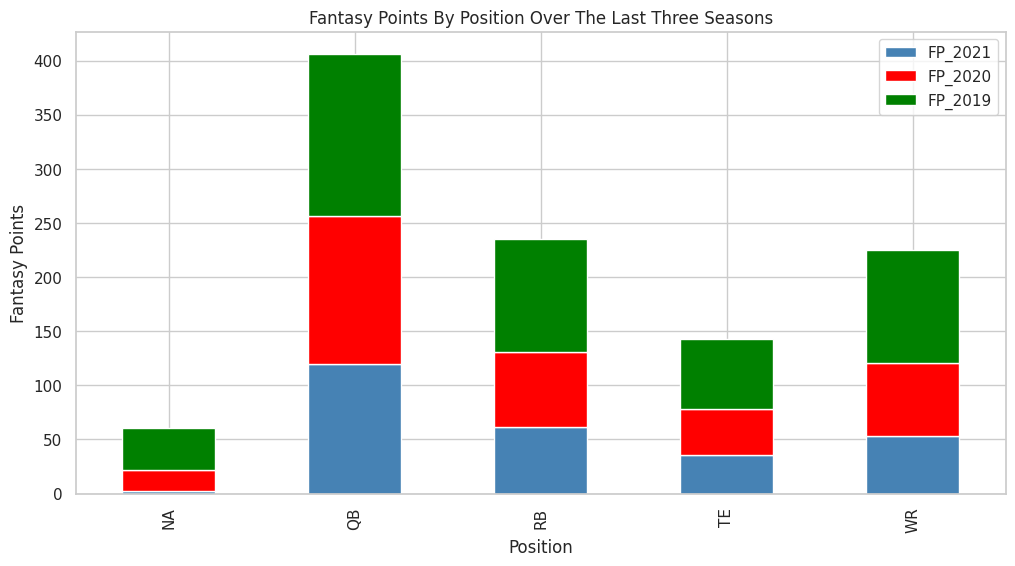

In [ ]:
#Visualize results
plt = positional_groups.plot(kind='bar', stacked=True, figsize=(12, 6), color=['steelblue', 'red', 'green'])

#Set axis labels
plt.set_xlabel("Position")
plt.set_ylabel("Fantasy Points")
plt.set_title("Fantasy Points By Position Over The Last Three Seasons")

<h5>Analysis of Scoring Positions</h5>

As the graph shows a quarterback (denoted as QB) records, on average, the most points of any position in a given year. This seems to make sense as quarterbacks touch the ball every offensive play, and thus have a higher probability to score points on a given play. In contrast, running backs may only touch the ball every other play, with wide recievers or tight ends touching the ball on other plays. Skill positions (WR, RB, and TE) thus have a smaller chance to gain points and make plays throughout a game, leading to less points over a season. Typically NFL teams have 1 primary quarterback 2-4 running backs who get play time, and many different recievers.

<h4>Analyzing The Top 50 Players</h4>

We will now look at the top 50 players and compare their positions and points over the past three seasons. This data in conjunction with data about the highest scoring positions will help inform us as to what positions we must target first, attempting to gain the highest possible point yield for 2023. We will do this by first sorting the players based on their points from 2019, 2020, and 2021, dealing with NaN values by putting them first ensuring that high scoring rookies (rookies have NaN values for seasons they did not play) are included in the analysis. We will then slice the table getting the top 50 fantasy performers over the last 3 seasons. Lastly we will plot the top 50 players by positional counts, i.e how many of the top 50 are QBs, RBs, etc. Sorting the values rather than computing a sum of points over the last 3 years per player will give us some valuble insights into top performers more recently. For example, Jonathan Taylor (a running back for Indianapolis) was a rookie in 2020 and thus didn't play in 2019, but had incredibly high points in 2020 and 20201. If we summed his points over the past three seasons and compared him, he would fall out of the top 50 players, which does not help our analysis. By sorting on descending years, we are able to get an accurate real time depiction of the hgihest scoring players.

,Player,Tm,Pos,Age,G,GS,Tgt,Rec,PassingYds,PassingTD,...,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,FP_2021,Int,Fumbles,FumblesLost,FP_2020,FP_2019
3,Josh Allen,BUF,QB,25,17,17,0.0,0.0,4407.0,36.0,...,6.0,122.0,0.0,0.0,403.0,15.0,8.0,3.0,395.0,282.56
5,Justin Herbert,LAC,QB,23,17,17,0.0,0.0,5014.0,38.0,...,3.0,63.0,0.0,0.0,381.0,15.0,1.0,1.0,333.0,NaN
6,Tom Brady,TAM,QB,44,17,17,0.0,0.0,5316.0,43.0,...,2.0,28.0,0.0,0.0,375.0,12.0,4.0,3.0,338.0,261.68
12,Patrick Mahomes,KAN,QB,26,17,17,0.0,0.0,4839.0,37.0,...,2.0,66.0,0.0,0.0,362.0,13.0,9.0,4.0,374.0,285.04
0,Jonathan Taylor,IND,RB,22,17,17,51.0,40.0,0.0,0.0,...,18.0,332.0,360.0,2.0,333.0,0.0,4.0,2.0,217.0,NaN


Pos
QB    26
RB    15
TE     1
WR     8
Name: Player, dtype: int64


<Axes: title={'center': 'Top 50 Players By Position'}, ylabel='Player'>

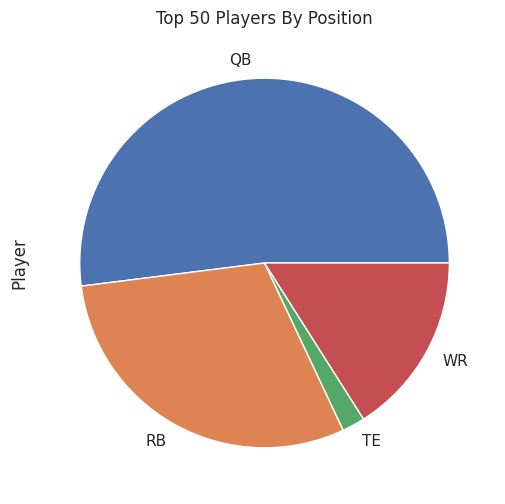

In [ ]:
#Sort the players on fantasy points over the past three seasons
#Ensure we compute based on descending
#.head(50) simply gives us the first 50 values, at this point the top 50 performing players
sorted = f_data.sort_values(by=["FP_2021", "FP_2020", "FP_2019"], ascending=[False, False, False], na_position='last').head(50)

display(sorted.head(5))

#Group by position
player_counts = sorted.groupby("Pos")["Player"].count()

print(player_counts)

#Create a pie chart to visualize
player_counts.plot.pie(figsize=(6, 6), title="Top 50 Players By Position")

<h5>Top 50 Players Analysis</h5>

The graph and informtation above shows some interesting results. First of all, we see that quarterbacks dominate the top 50 spots, with 26 total quarterbacks in the top 50 fantasy performers over the last 3 seasons. We also see that there is only 1 tight end in the top 50 players, indicating that tight ends aren't generally high point providers. We also see that there are only 8 wide recievers and 15 running backs. So how do we analyze this data and what use does it provide us? 

As the data, and visualization suggest, it is harder to draft a high performing running back or wide reciever. Fantasy leagues usually contain 6-12 teams, so even if every person took two quarterbacks in the top 50, each person would have two top 50 performers on their team. This makes it less important to draft a quarterback in the early rounds since good, high performing quarterbacks will generally always be available. However, when we look at running backs and wide recievers this does not tend to be the case. These two positions are much harder to fill with elite talent since there are less of these positions in the top 50 of fantasy point performers. This makes it imperative to select a WR and RB in the lower rounds of the draft since elite, high performing, talent will likely not be available in higher rounds. For example, lets take a fantasy league of 12 players. Assuming everyone in the league selects a RB and a WR in the first two rounds (which tends to be the case in my many fantasy losses) that yields 24 total players taken, there are only 23 total WR and RB in the top 50 fantasy performers. This means one person has been forced to take a WR or RB that is not in the top 50 players. This data also shows that tight ends are generally low performers, meaning it is less important to select a tight end in the early rounds as comparable tight ends should be available in the later rounds. This also means that it will be harder to target a tight end in the early rounds. For example, if I pick second, and the person ahead of me selects the top tight end and I then proceed to take a tight end, i've missed out on a top 50 performer as my first pick.

All of this being said, when making early fantasy picks in 2023, we should target WR and RB as there are fewer players in those positions that yield high fantasy point output, but are still viable targets that should be available when it is our turn to pick a player. 

First Round: RB or WR?

As we now know, a RB or WR should be drafted early, since there are few high performing RB's and WR's as opposed to the multitude of elite QB's. Seeing as this is the case, the question arises: should we draft a RB or WR in the first round? Or rather, does it not matter whether we draft a RB or WR early? Let's see if there is a substantial difference

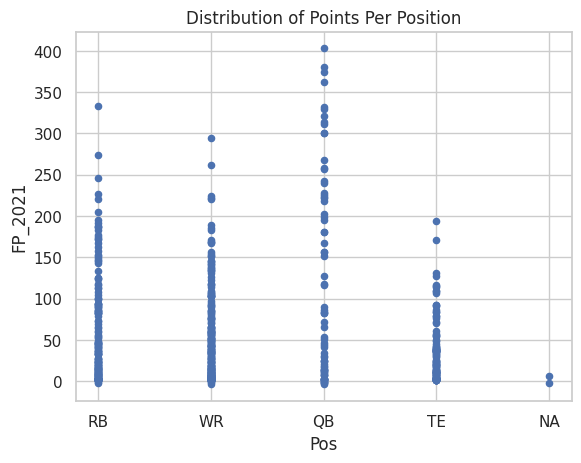

In [ ]:
# Creating scatter plot
ax = f_data.plot.scatter(x='Pos', y='FP_2021', title="Distribution of Points Per Position")


Scatter plot of Fanatasy Points in 2021 versus position. As we can see, the points are clustered together making the data hard to visualize. Let's try turning this into a violin plot.

Text(0.5, 1.0, 'Point Distribution 2019')

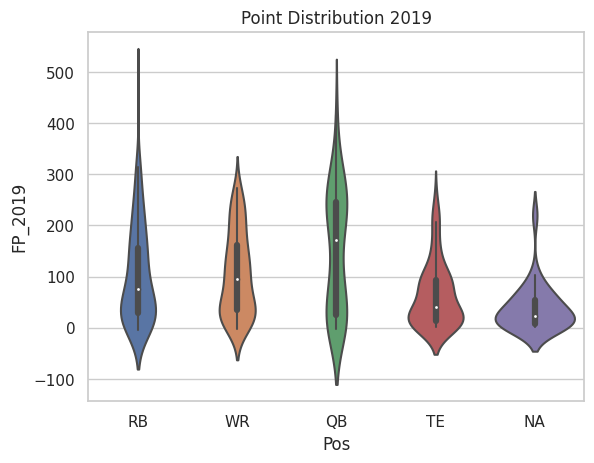

In [ ]:
# Creating Violin Plot
    
seaborn.set(style = 'whitegrid')
    
seaborn.violinplot(x ="Pos",
             y ="FP_2019",
             data = f_data).set_title("Point Distribution 2019")

Distribution of fantasy points scored in 2019 for each position. As we can see, the top running backs in 2019 scored better than the wide receivers. However, the median and lower/upper quartile of wide receivers was higher for wide recievers than running backs. Let's see if this holds true for 2020 and 2021.

Text(0.5, 1.0, 'Point Distribution 2020')

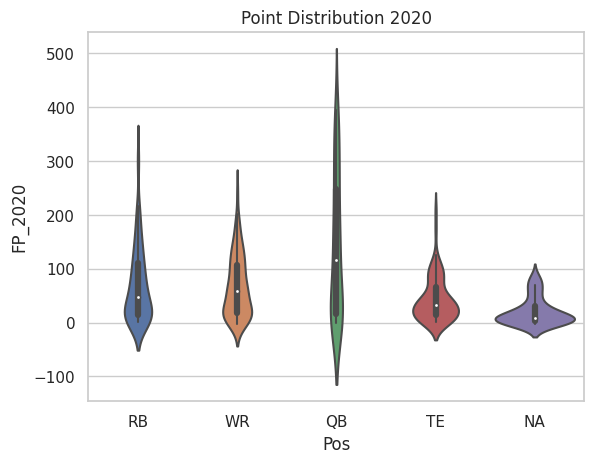

In [ ]:
# Creating Violin Plot
 
seaborn.set(style = 'whitegrid')
    
seaborn.violinplot(x ="Pos",
             y ="FP_2020",
             data = f_data).set_title("Point Distribution 2020")

Distribution of fantasy points scored in 2020 for each position. Once again, the top running backs in 2020 outperformed the top wide recievers. However, the median for points scored was higher for wide receivers, with similar upper and lower quartiles.

Text(0.5, 1.0, 'Point Distribution 2021')

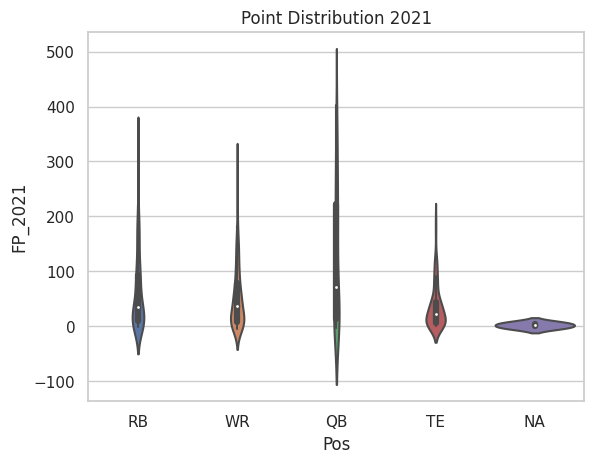

In [ ]:
# Creating Violin Plot
  
seaborn.set(style = 'whitegrid')
    
seaborn.violinplot(x ="Pos",
             y ="FP_2021",
             data = f_data).set_title("Point Distribution 2021")

Distribution of fantasy points scored in 2021 for each position. Note, the violin plots seem "skinnier" than past years since there is less available data for recent years. Nevertheless, in 2021 it once again holds true that the top running backs outperformed the top wide recievers. However, wide receivers in 2021 had a higher median and upper/lower quartile of points.

By inspection, RB's and WR's have similar means (WR's tend to have the higher mean), but RB's seem to have a higher ceiling. However, this is not clear-cut enough to make a decision on RB's vs. WR's. As we can see, RB's and WR's have similar distributions in points, so a better way to make our decision could be to see which position is more reliable. From our above plots, we can hypothesize that WR's are more reliable, while RB's have a higher ceiling. We will attempt to prove this in the following section.

<h3>Section 3: Linear Regressions and Future Predictions</h3>

As we can see from section 2, our best picks in the early rounds of the draft are going to be running backs and wide recievers, primarily due to the fact that it is harder to find elite talent at those two positions than it is for quarterbacks. In this section, we will analyze these trends and attempt to fit linear regression models to both positions based on information such as targets, yards, catches, rushing yards, and touchdowns to see what players will be the best at both positions. This will give us more insight as to which specific players we may want to target in the early rounds of our draft. As mentioned in the opening description of the project, we will focus the analysis on the early rounds of the draft as it is more predictable. 

<h4>Running Back Regression Analysis</h4>

We will start analyzing the running backs based on data from 2021 as it has the most complete data with all players. Doing a regression over the past three seasons for all players would hinder our analysis as there are many players who weren't drafted until 2021, meaning they do not have data for 2020 and 2019. Analyzing direct data from 2021 will allow us to see the most relevant and statistically accurate data opposed to analyzing all players over the course of 3 seasons. This being said, we can run statistical analysis on individual players over the past 3 seasons to see trends, for example, if they have been in a steady decline or incline of points.

In [ ]:
#First get all the running backs from the 2021 season
#We want to make a deep copy here to ensure that the original dataframe remains the same for analysis purposes
df_2021_rb = df_2021.copy(deep=True) 

df_2021_rb = df_2021_rb.loc[df_2021_rb["Pos"] == 'RB']

display(df_2021_rb.head(5))

,Player,Tm,Pos,Age,G,GS,Tgt,Rec,PassingYds,PassingTD,PassingAtt,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,FP_2021,Int,Fumbles,FumblesLost
0,Jonathan Taylor,IND,RB,22,17,17,51.0,40.0,0.0,0.0,0.0,1811.0,18.0,332.0,360.0,2.0,333.0,0.0,4.0,2.0
4,Austin Ekeler,LAC,RB,26,16,16,94.0,70.0,0.0,0.0,0.0,911.0,12.0,206.0,647.0,8.0,274.0,0.0,4.0,3.0
10,Joe Mixon,CIN,RB,25,16,16,48.0,42.0,0.0,0.0,0.0,1205.0,13.0,292.0,314.0,3.0,246.0,0.0,2.0,1.0
13,Najee Harris,PIT,RB,23,17,17,94.0,74.0,0.0,0.0,0.0,1200.0,7.0,307.0,467.0,3.0,227.0,0.0,0.0,0.0
15,James Conner,ARI,RB,26,15,6,39.0,37.0,0.0,0.0,0.0,752.0,15.0,202.0,375.0,3.0,221.0,0.0,2.0,0.0


In [ ]:
#Create a linear regression model based on rushing yards and recieving yards 
reg_model_yds = smf.ols(formula="FP_2021 ~ RushingYds + ReceivingYds", data=df_2021_rb[["FP_2021", "RushingYds", "ReceivingYds"]]).fit()

#Create a linear regression model based on rushing td and receiving yards
reg_model_tds = smf.ols(formula="FP_2021 ~ RushingTD + ReceivingTD", data=df_2021_rb[["FP_2021", "RushingTD", "ReceivingTD"]]).fit()

df_2021_rb["predicted_points_yds"] = reg_model_yds.predict(df_2021_rb[["RushingYds", "ReceivingYds"]])

df_2021_rb["predicted_points_tds"] = reg_model_tds.predict(df_2021_rb[["RushingTD", "ReceivingTD"]])

#Display the statistics
print(reg_model_yds.summary())
print(reg_model_tds.summary())

                            OLS Regression Results                            
Dep. Variable:                FP_2021   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     2641.
Date:                Fri, 12 May 2023   Prob (F-statistic):          5.12e-126
Time:                        16:20:49   Log-Likelihood:                -648.74
No. Observations:                 168   AIC:                             1303.
Df Residuals:                     165   BIC:                             1313.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -1.5935      1.242     -1.283   

eval_env: 1
eval_env: 1
eval_env: 1


<Figure size 1500x1500 with 0 Axes>

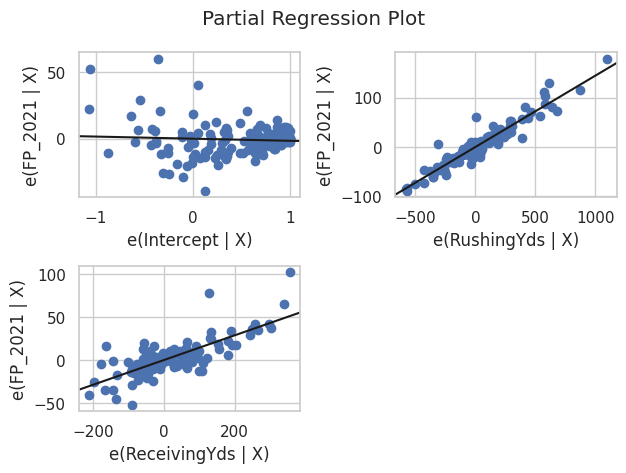

In [ ]:
#Plot the display for yds model
fig = plt.figure(figsize=(15,15))

fig = sm.graphics.plot_partregress_grid(reg_model_yds)
fig.tight_layout(pad=1.0)

eval_env: 1
eval_env: 1
eval_env: 1


<Figure size 1500x1500 with 0 Axes>

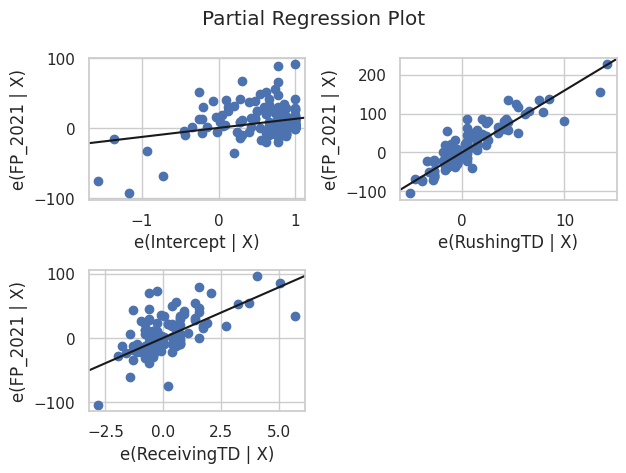

In [ ]:
#Plot the display for tds model
fig = plt.figure(figsize=(15,15))

fig = sm.graphics.plot_partregress_grid(reg_model_tds)
fig.tight_layout(pad=1.0)

<ipython-input-84-2efcf893b078>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["\n"*(i%2) + l for i,l in enumerate(sorted_rb_yards["Player"])])


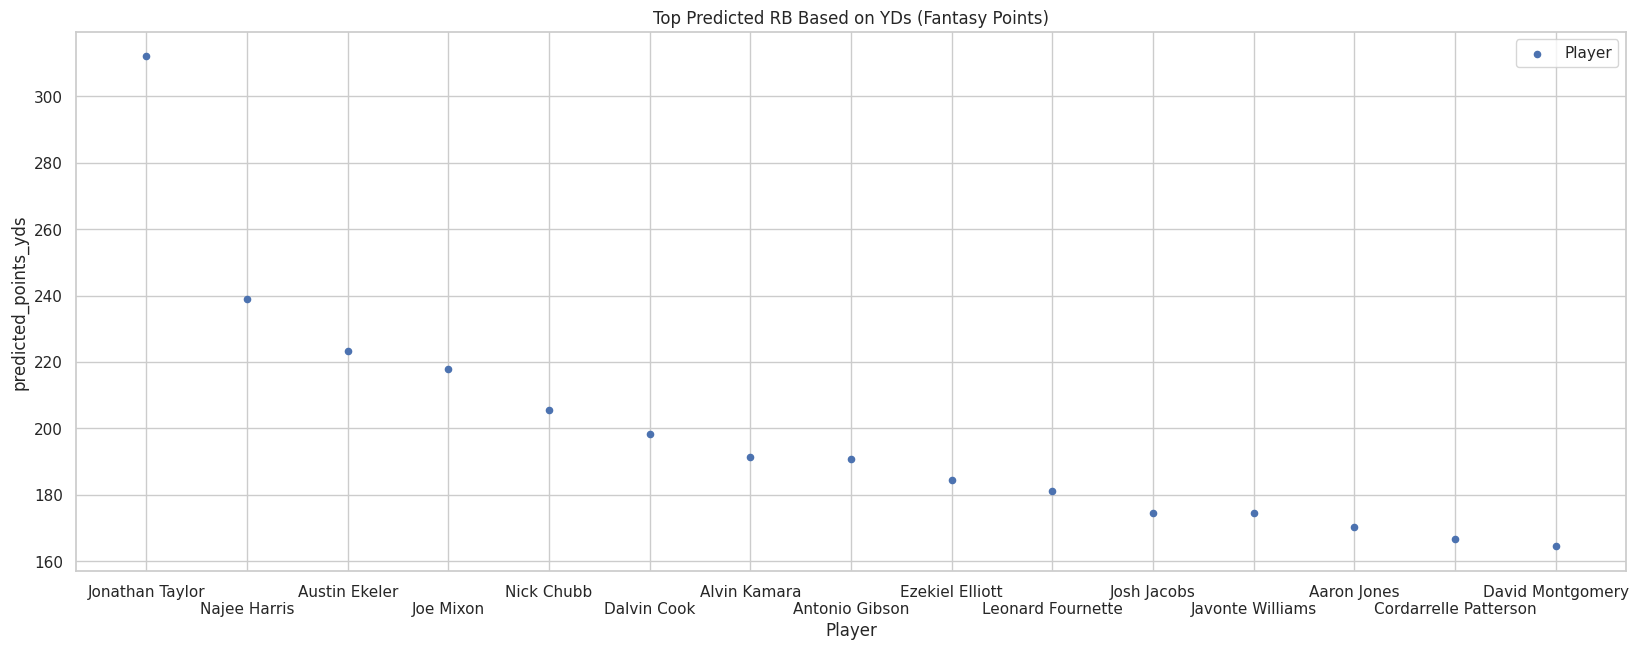

In [ ]:
#Plot the data accordingly for a visual representation

fig, ax = plt.subplots(figsize=(20, 7))

#Sort the top 15 of points based on predicted points relating to yards
sorted_rb_yards = df_2021_rb.sort_values(by=["predicted_points_yds"], ascending=[False], na_position='last').head(15)

sorted_rb_yards.plot(kind="scatter", x="Player", y="predicted_points_yds", label="Player", ax=ax, title="Top Predicted RB Based on YDs (Fantasy Points)")

#Set xticks so they are scattered
ax.set_xticklabels(["\n"*(i%2) + l for i,l in enumerate(sorted_rb_yards["Player"])])

plt.show()

<ipython-input-85-4b4137c2a839>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["\n"*(i%2) + l for i,l in enumerate(sorted_rb_tds["Player"])])


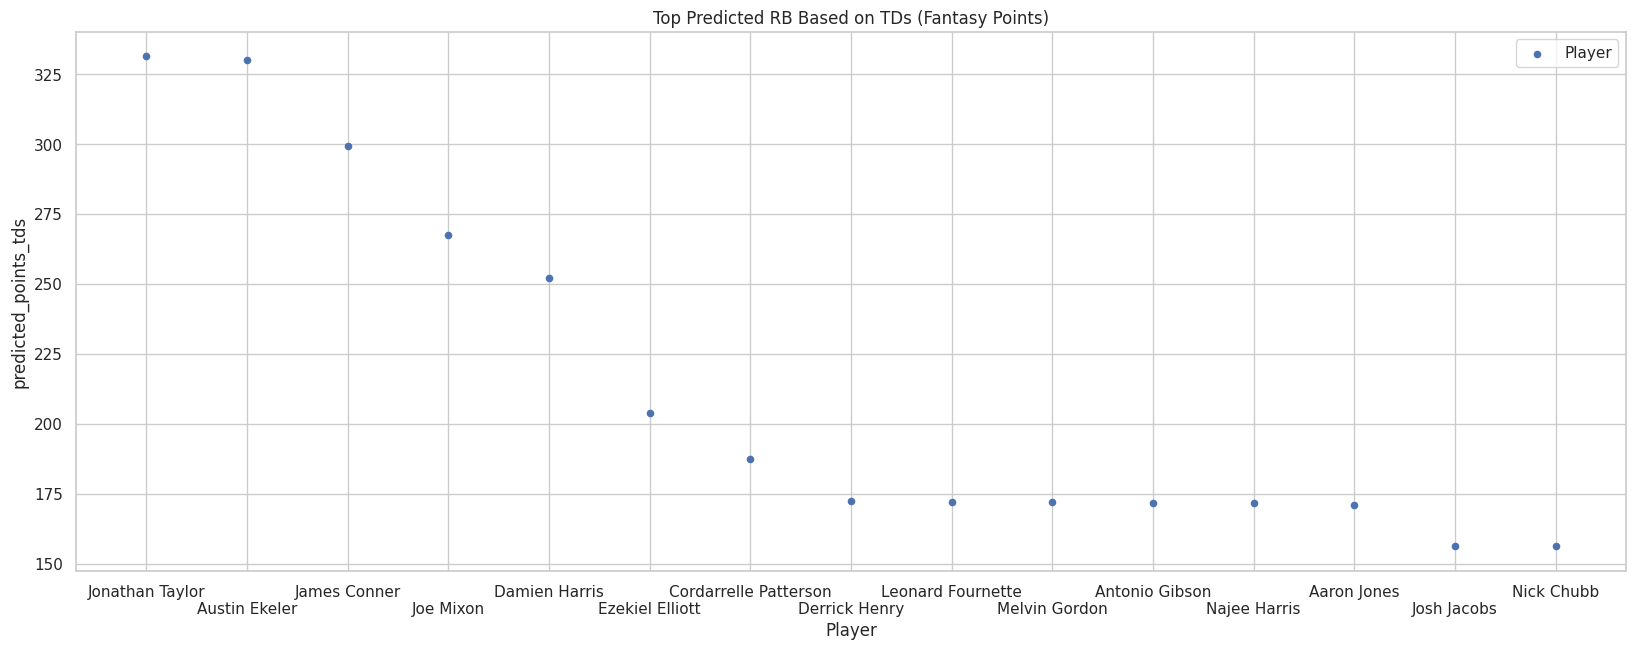

In [ ]:
#Plot the data accordingly for a visual representation

fig, ax = plt.subplots(figsize=(20, 7))

#Sort the top 15 of points based on predicted points relating to yards
sorted_rb_tds = df_2021_rb.sort_values(by=["predicted_points_tds"], ascending=[False], na_position='last').head(15)

sorted_rb_tds.plot(kind="scatter", x="Player", y="predicted_points_tds", label="Player", ax=ax, title="Top Predicted RB Based on TDs (Fantasy Points)")

#Set xticks so they are scattered
ax.set_xticklabels(["\n"*(i%2) + l for i,l in enumerate(sorted_rb_tds["Player"])])

plt.show()

<h4>Running Back Analysis</h4>

The results found above are fairly substantial, and definitely seem cause for analysis. It is obvious that there is a clear cut winner when it comes to running backs, Jonathan Taylor. Taylor has the highest predicted points based on rushing yards and touchdowns. However, the rest of the running backs are quite interesting. As we can see, Najee Harris ranks second in predicted points based on rushing yards, but finishes almost last in terms of predicted points from touchdowns. This suggests that Harris is a workhorse all over the field, but is rarely utilized in the red zone (final 20 yards until the touchdown, and highest percentage of a endzone). We can see that James Conner is predicted with high points in terms of touchdowns, but doesn't even fall in the top 15 for predicted points with respect to rushing yards. This distinction happens across the board as it appears some players get more rushing yards with lower touchdowns, and some players get more touchdowns but lower rushing yards. Because of this, we want to find a medium where we get high points from touchdowns and high points from rushing yards.

<h4>Total Running Back Analysis</h4>

We will now combine the linear regression models to get a more accurate picture of how running backs compare to eachother, and how they are predicted to perform in the 2023 season.

In [ ]:
#Combine all independent fields into one model
reg_model_rb_total = smf.ols(formula="FP_2021 ~ RushingYds + ReceivingYds + RushingTD + ReceivingTD", data=df_2021_rb[["FP_2021", "RushingYds", "ReceivingYds", "RushingTD", "ReceivingTD"]]).fit()

df_2021_rb["predicted_points_all"] = reg_model_yds.predict(df_2021_rb[["RushingYds", "ReceivingYds", "RushingTD", "ReceivingTD"]])

display(df_2021_rb[["Player", "predicted_points_all"]])

print(reg_model_rb_total.summary())

,Player,predicted_points_all
0,Jonathan Taylor,312.054994
4,Austin Ekeler,223.248400
10,Joe Mixon,217.820105
13,Najee Harris,239.120863
15,James Conner,161.107586
...,...,...
594,Nathan Cottrell,-1.159778
628,Nate McCrary,-1.738085
634,Devine Ozigbo,-1.019620
660,Khari Blasingame,-0.150267


                            OLS Regression Results                            
Dep. Variable:                FP_2021   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.973e+04
Date:                Fri, 12 May 2023   Prob (F-statistic):          2.19e-250
Time:                        16:21:51   Log-Likelihood:                -345.44
No. Observations:                 168   AIC:                             700.9
Df Residuals:                     163   BIC:                             716.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.1009      0.207      0.487   

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


<Figure size 1500x1500 with 0 Axes>

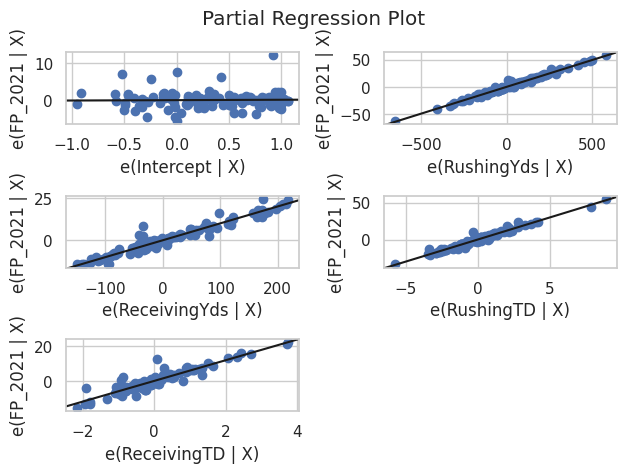

In [ ]:
#plot the linear regression statistics
fig = plt.figure(figsize=(15,15))

fig = sm.graphics.plot_partregress_grid(reg_model_rb_total)
fig.tight_layout(pad=1.0)

<ipython-input-88-b7eec5b95fa5>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["\n"*(i%2) + l for i,l in enumerate(sorted_rb_tds["Player"])])


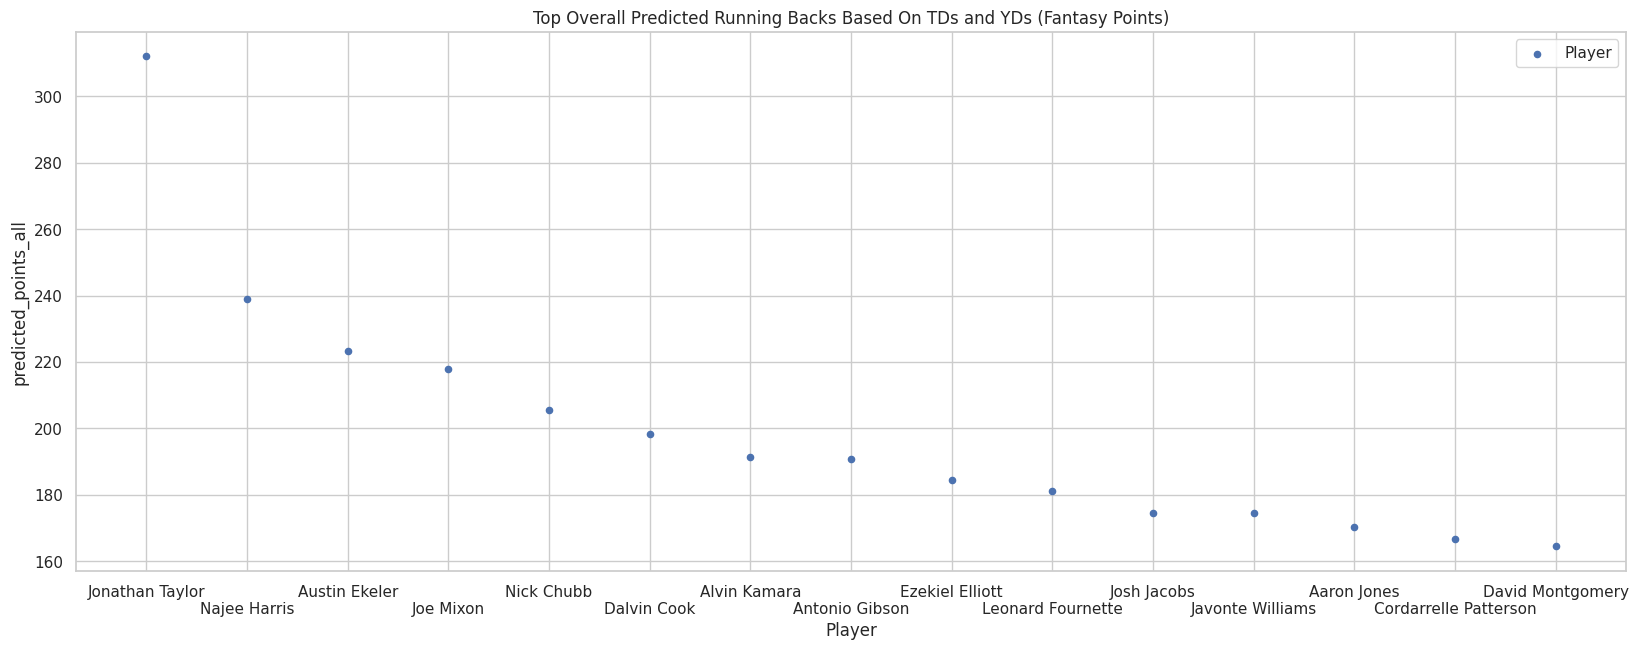

In [ ]:
fig, ax = plt.subplots(figsize=(20, 7))

#Sort the top 15 of points based on predicted points relating to yards
sorted_rb_tds = df_2021_rb.sort_values(by=["predicted_points_all"], ascending=[False], na_position='last').head(15)

sorted_rb_tds.plot(kind="scatter", x="Player", y="predicted_points_all", label="Player", ax=ax, title="Top Overall Predicted Running Backs Based On TDs and YDs (Fantasy Points)")

#Set xticks so they are scattered
ax.set_xticklabels(["\n"*(i%2) + l for i,l in enumerate(sorted_rb_tds["Player"])])

plt.show()

<h4>Best Running Backs to Select</h4>

From the scatter plot above it is evident that Jonathan Taylor is by far the best running back to select going into the 2023 season, with Najee Harris, Austin Ekeler, Joe Mixon, and Nick Chubb rounding out the top 5. It is important to note here that James Conner is not in the top 15 here, primarily due to his lack of rushing yards, although he's predicted to get a large amount of points from touchdowns. This being said, it would be unwise to select a player like Conner early because of his total lack of production even given his high points from touchdowns. For our early predictions we want well rounded players who can earn us points through touchdowns and rushing/receiving yards, and thus would target these top 5 running backs.

<h4>Wide Reciever Regression Analysis</h4>

We now want to move onto wide recievers to see how they compare to one another, and how they compare to the running backs. Due to the nature of wide recievers, we will not include rushing yards in their regression analysis as wide recievers rarely rush in the NFL and are rather utilized in sweep playd that garner low yardage. However, we will include rushing touchdowns as rushing touchdowns account for a lot of points and are more prevelant than rushes for yards (for wide recievers).

In [ ]:
#First get all the running backs from the 2021 season
#Again we make a deep copy to ensure original data remains the same
df_2021_wr = df_2021.copy(deep=True)
df_2021_wr = df_2021_wr.loc[df_2021_wr["Pos"] == 'WR']

#Create a linear regression model based on rushing yards and recieving yards 

reg_model_wr = smf.ols(formula="FP_2021 ~ ReceivingYds + ReceivingTD + RushingTD", data=df_2021_wr[["FP_2021", "ReceivingTD", "ReceivingYds", "RushingTD"]]).fit()

df_2021_wr["predicted_points_all"] = reg_model_wr.predict(df_2021_wr[["RushingTD", "ReceivingYds", "ReceivingTD"]])

sorted_wr = df_2021_wr.sort_values(by=["predicted_points_all"], ascending=[False], na_position='last').head(8)

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


<Figure size 1500x1500 with 0 Axes>

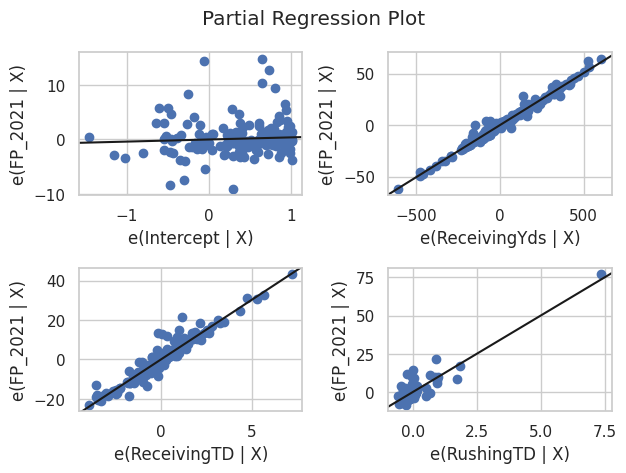

In [ ]:
#plot wr statistics
fig = plt.figure(figsize=(15,15))

fig = sm.graphics.plot_partregress_grid(reg_model_wr)
fig.tight_layout(pad=1.0)

<ipython-input-91-0400b468debd>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["\n"*(i%2) + l for i,l in enumerate(sorted_wr["Player"])])


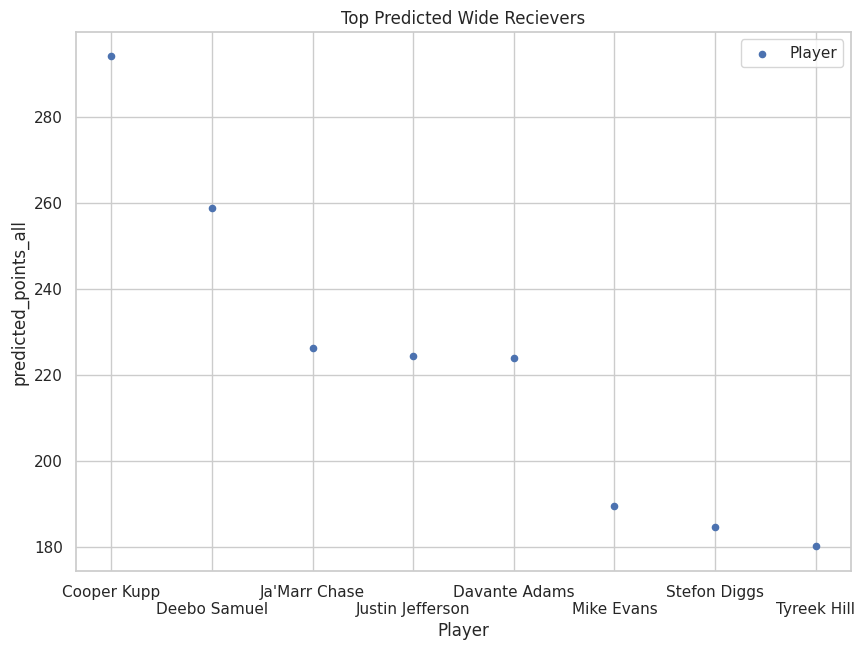

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))

sorted_wr.plot(kind="scatter", x="Player", y="predicted_points_all", label="Player", ax=ax, title="Top Predicted Wide Recievers")

#Set xticks so they are scattered
ax.set_xticklabels(["\n"*(i%2) + l for i,l in enumerate(sorted_wr["Player"])])

plt.show()

<h4>Best Wide Recievers To Select</h4>

From the visualizations above, it is apparent that Cooper Kupp and Deebo Samuel stand out among the rest of the recievers, making them the best options to take at reciever. Deebo Samuel is often used in the slot as a running back in the red zone, thus gets quite a few rushing touchdowns, adding to his total predicted points.

<h4>Do We Take A Running Back or A Wide Reciever First?</h4>

This question is tough because it truly depends on who is available at the time you make your selection! However, we have enough data to make an educated guess based on player's predicted points for the 2023 season. All 8 of the top wide recievers are predicted to have over 180 points, while the top 10 running backs are predicted to have over 180 points. However, the decline in the top 15 running backs is much more gradual than that of wide recievers, meaning it is easier to predict a running back's production, but the wide recievers are more scattered. Ultimately we believe it is better to take an elite wide reciever in the early rounds than it is to take a running back. First off, there are more running backs that are predicted to score higher fantasy points than their wide reciever counterparts. Secondly, the decline in running backs is much more gradual and predictable. This means that wherever our pick lands, our pick at running back will be comparable to the person that picked before us and after us. This is not the case with wide recievers, they seem to be much more unpredictable with steeper peaks and bigger differences between recievers. Because of this, it is safter to take a good, proven, wide reciever as it will be harder to select good wide recievers as the draft progresses. We will then take a running back in the second round, aiming at a reliable player in the top 15. We should stick to this rule and select the best, which happens to be the best predicted scoring, player in that at the time of selection. For example, we want to select the best available wide reciever in the first round, and then the best available running back in the second round.

<h3>Section 4: Machine Learning Insights</h3>

In this section we will produce machine learning models and techniques to depict how accurate the data is in an attempt to predict how reliable top, and under, performers will be in 2023. 

For more information about ridge regression and machine learning please visit https://www.mygreatlearning.com/blog/what-is-ridge-regression/#:~:text=Ridge%20regression%20is%20a%20model,away%20from%20the%20actual%20values and https://www.ibm.com/topics/machine-learning 

Ridge regression score on test data: 0.509


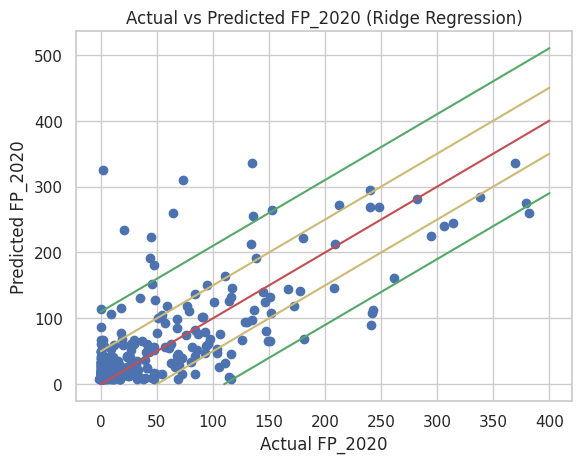

In [ ]:
#ML model that predicts a players Fantasy Points in 2020 based on how they do in 2019
df_2019m = df_2019.copy(deep=True) 


merged_df = pd.merge(df_2019m, df_2020[['Player', 'FP_2020']], on='Player', how='left').fillna(0)

X = merged_df[['PassingYds','PassingTD', 'ReceivingYds', 'ReceivingTD', 'RushingTD', 'FP_2019']]

y = merged_df['FP_2020']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5, random_state=42)

ridge = Ridge(alpha=0.1) # Alpha is the regularization parameter
ridge.fit(X_train, y_train)

print('Ridge regression score on test data: {:.3f}'.format(ridge.score(X_test, y_test)))
y_pred = ridge.predict(X_test)
plt.plot([0, 400], [0, 400], 'r-')
plt.plot([0, 400], [50, 450], 'y-')
plt.plot([50, 400], [0, 350], 'y-')
plt.plot([0, 400], [110, 510], 'g-')
plt.plot([110, 400], [0, 290], 'g-')

plt.scatter(y_test, y_pred)
plt.xlabel('Actual FP_2020')
plt.ylabel('Predicted FP_2020')
plt.title('Actual vs Predicted FP_2020 (Ridge Regression)')
plt.show()



In this graph we are using the 2019 data to train and predict the fantasy points a player will score in 2020. In this case, the closer the points are to the red line, the more accurate the prediction for that player. We are impressed by how many of the points fall between the yellow lines which represent 10% error. The green lines represent 25% error. Above the green line we have athletes that severly underpreformed in points production. Below the lower green line we have overpreformers. It is logical that there are more severe underpreformers because of injuries, missed playtime, ect.. Very few of the overpreformers, outpaced the predicted scored by more than 25%. those 4 athletes that outpreformed the green line did it just barely.

Ridge regression score on test data: 0.532


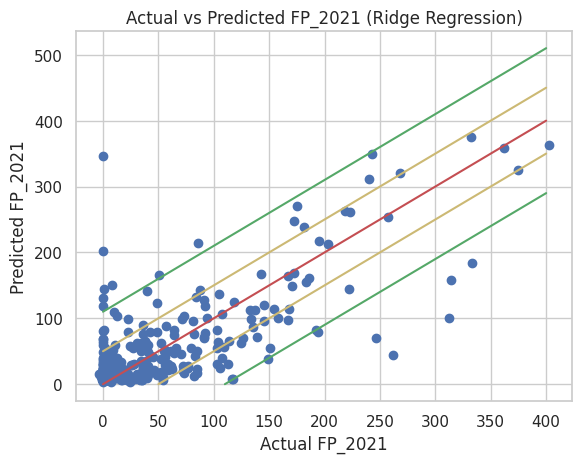

In [ ]:
#ML model that predicts a players Fantasy Points in 2021 based on how they do in 2020


df_2020m = df_2020.copy(deep=True) 


merged_df = pd.merge(df_2020m, df_2021[['Player', 'FP_2021']], on='Player', how='left').fillna(0)

X = merged_df[['PassingYds','PassingTD', 'ReceivingYds', 'ReceivingTD', 'RushingTD', 'FP_2020']]
# X= merged_df[['FP_2020']

y = merged_df['FP_2021']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5, random_state=42)

ridge = Ridge(alpha=0.1) # Alpha is the regularization parameter
ridge.fit(X_train, y_train)

print('Ridge regression score on test data: {:.3f}'.format(ridge.score(X_test, y_test)))
y_pred = ridge.predict(X_test)

plt.plot([0, 400], [0, 400], 'r-')
plt.plot([0, 400], [50, 450], 'y-')
plt.plot([50, 400], [0, 350], 'y-')
plt.plot([0, 400], [110, 510], 'g-')
plt.plot([110, 400], [0, 290], 'g-')

plt.scatter(y_test, y_pred)
plt.xlabel('Actual FP_2021')
plt.ylabel('Predicted FP_2021')
plt.title('Actual vs Predicted FP_2021 (Ridge Regression)')
plt.show()


Here, using 2020 to predict 2021, the prediction seems to be better. There are more points very near the red line, lending a tighter distribution. More of the points are inside the yellow band than the previous year. There apears to have been less injuries, people well above the green line with high predicted and low preformance. Also, in this season the those overpreformers below the green line have surpassed the prediction by quite a margin, compared to last year.

Looking at both graphs we can see that high point earners (above 250 actual fantasy points) are more likely to overpreform than underpreform. Looking only at the values to the right of 250, most of them are overpreformers, because they fall below the red line.

In general we can say from looking at these two graphs that undervalued players are the best way to gain extra fantasy points. 

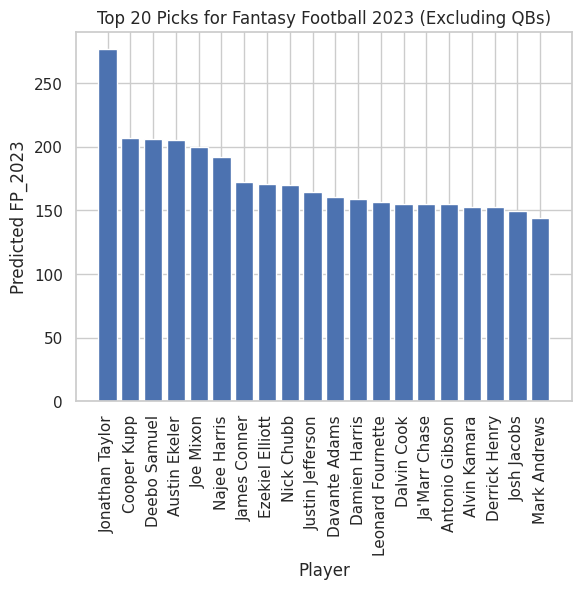

In [ ]:
# create a new dataframe with the required columns from df_2021
df_2021 = df_2021.rename(columns={'FP_2021': 'FP_2020'})

df_2021_predict = df_2021[['PassingYds','PassingTD', 'ReceivingYds', 'ReceivingTD', 'RushingTD', 'FP_2020']].copy()

# make predictions on the new dataframe
y_pred_2023 = ridge.predict(df_2021_predict)

# add the predictions to a new column in the original df_2021
df_2021['FP_2023'] = y_pred_2023

# sort the DataFrame by predicted FP_2022 in descending order
df_2021_sorted = df_2021.sort_values(by='FP_2023', ascending=False)


#Want only the non quarterbacks
df_2021_sorted = df_2021_sorted.loc[df_2021_sorted["Pos"] != 'QB']

# get the top 10 picks
top_20_picks = df_2021_sorted.head(20)

# create a bar chart showing the predicted FP_2022 for each player
plt.bar(top_20_picks['Player'], top_20_picks['FP_2023'])
plt.xticks(rotation=90)
plt.xlabel('Player')
plt.ylabel('Predicted FP_2023')
plt.title('Top 20 Picks for Fantasy Football 2023 (Excluding QBs)')
plt.show()

Here, using the model that predicted the fantasy point values for players in 2021 based on their data from 2020, we predict the fantasy point values for players in 2022 based on their data from 2021. The top 20 picks based on their predicted 2022 points are displayed in the chart above. It displays a clear heirarchy for people's pick order for their fantasy drafts in 2023. We also see that this data is fairly consistent with the data found in our linear regressions. Runningbacks seem to dominate top positions (disregarding quarterbacks). We see that a couple wide recievers make it into the top 20, but there are more running backs in the top 20 than there are wide recievers, telling us we need to draft a wide reciever like Cooper Kupp or Deebo Samuel in the first round, with a running back like Derrick Henry or Josh Jacobs in the second round.




<h3>Summary</h3>

In this tutorial we explored data science techniques aimed at giving insights as to what players we should select early in our draft to give us the best chance of winning our 2023 fantasy football season. Through data exploration we saw that the top performing position were quarterbacks, with many less top performing players being in the skill positions (running backs and wide recievers). We concluded that this information meant it would be hard to come across elite wide reciever and running back talent in the late rounds of the draft, ultimately leading us to to the conclusion that we should take a wide reciever and a running back in the first 2 rounds. We then used linear regression techniques to better depict the better overall first pick position and what players we may want to target. We found that we should target wide recievers like Cooper Kupp, Deebo Samuel, and Justin Jefferson, while we should target running abcks like Josh Jacobs and Derrick Henry in the second round. Finally, we used machine learning to better depict the best players based on stats from previous seasons, along with how reliable their points would be. Through these models we found similar results to our linear regressions, giving us an accurate picture as to what positions, and more importantly which players we should draft early in 2023.